In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
la = list(uploaded.keys())[0]
csco = pd.read_csv(la)
csco

Saving CSCO.csv to CSCO (1).csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-02-16,0.000000,0.079861,0.073785,0.077257,0.053231,940636800
1,1990-02-20,0.000000,0.079861,0.074653,0.079861,0.055025,151862400
2,1990-02-21,0.000000,0.078993,0.075521,0.078125,0.053829,70531200
3,1990-02-22,0.000000,0.081597,0.078993,0.078993,0.054427,45216000
4,1990-02-23,0.000000,0.079861,0.078125,0.078559,0.054128,44697600
...,...,...,...,...,...,...,...
8486,2023-10-25,53.110001,53.369999,52.330002,52.400002,52.400002,14384700
8487,2023-10-26,51.869999,52.130001,51.310001,51.369999,51.369999,17594500
8488,2023-10-27,51.639999,52.150002,51.400002,51.560001,51.560001,13333400
8489,2023-10-30,51.349998,51.639999,51.090000,51.570000,51.570000,13322400


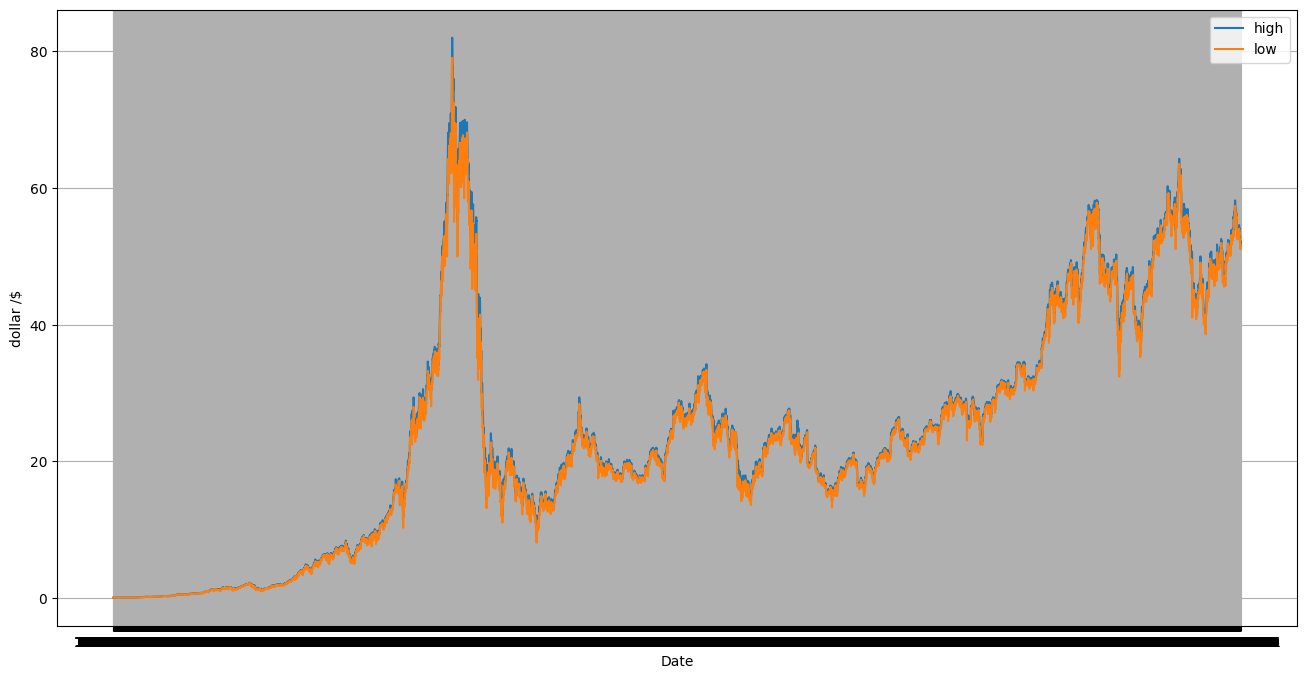

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

plt.plot(csco['Date'],csco['High'],label='high')
plt.plot(csco['Date'],csco['Low'],label='low')

plt.xlabel('Date')
plt.ylabel('dollar /$')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("cisco",csco.shape)

cisco (8491, 7)


In [ ]:
csco.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8491.000000,8491.000000,8491.000000,8491.000000,8491.000000,8.491000e+03
mean,23.463365,23.759811,23.158570,23.461346,18.432567,5.292970e+07
std,16.762119,16.965311,16.546803,16.760438,14.917714,4.108786e+07
min,0.000000,0.072917,0.068576,0.071181,0.049044,8.064000e+05
25%,12.302084,12.704166,12.055000,12.270833,8.454725,2.673735e+07
50%,21.290001,21.559999,21.070000,21.270000,14.923951,4.542810e+07
75%,31.425000,31.660000,31.175000,31.468750,24.443344,6.520570e+07
max,81.437500,82.000000,79.062500,80.062500,60.169125,9.406368e+08


In [ ]:
csco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8491 entries, 0 to 8490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8491 non-null   object 
 1   Open       8491 non-null   float64
 2   High       8491 non-null   float64
 3   Low        8491 non-null   float64
 4   Close      8491 non-null   float64
 5   Adj Close  8491 non-null   float64
 6   Volume     8491 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 464.5+ KB


In [ ]:
csco.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

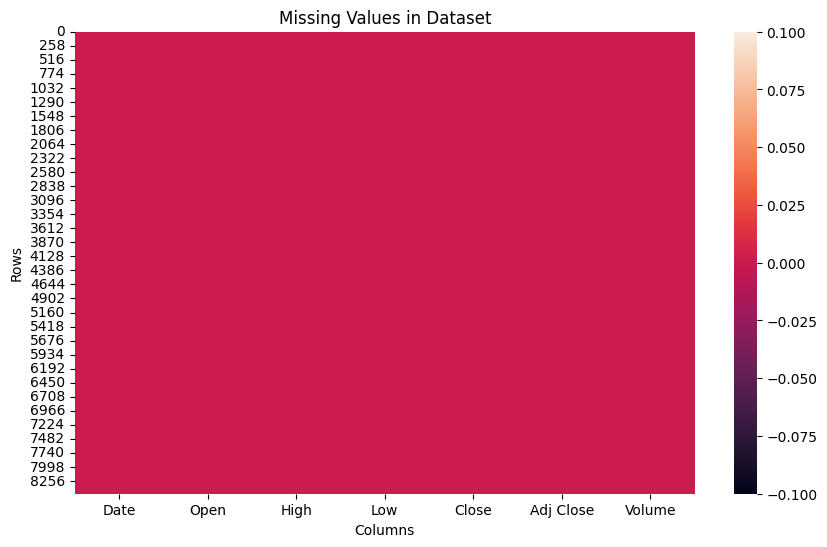

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(csco.isna())
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values in Dataset')
plt.show()

In [ ]:
csco.corr()

<ipython-input-9-582c9cd7b297>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  csco.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999714,0.999685,0.999445,0.978933,-0.457399
High,0.999714,1.000000,0.999452,0.999698,0.977787,-0.452945
Low,0.999685,0.999452,1.000000,0.999668,0.980807,-0.462504
Close,0.999445,0.999698,0.999668,1.000000,0.979577,-0.457785
Adj Close,0.978933,0.977787,0.980807,0.979577,1.000000,-0.470059
Volume,-0.457399,-0.452945,-0.462504,-0.457785,-0.470059,1.000000


In [ ]:
x_csco = csco.iloc[:,1:4]
y_csco = csco.iloc[:,4:5]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


x_scaled_csco = scaler.fit_transform(x_csco)

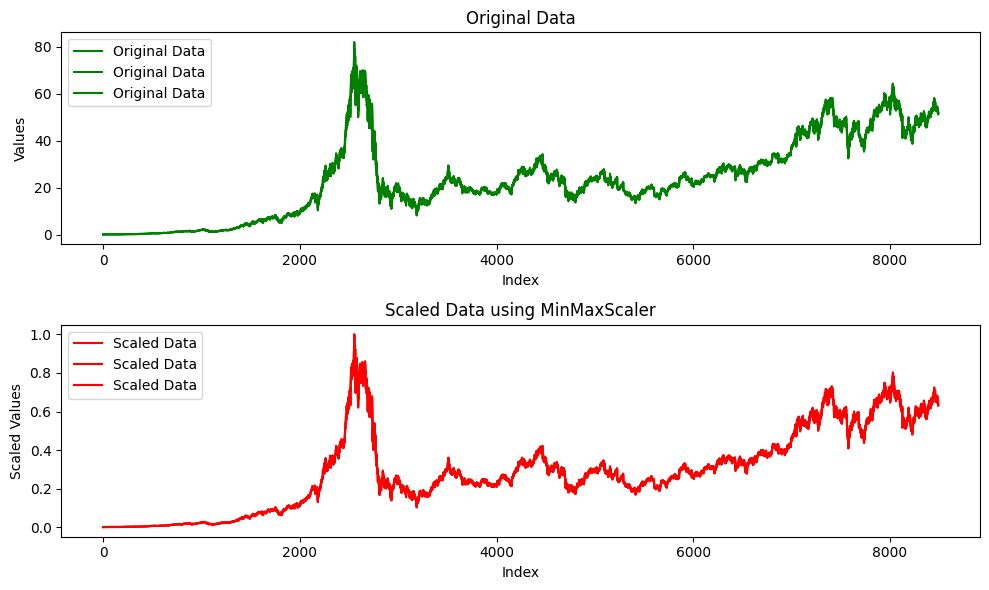

In [ ]:
plt.figure(figsize=(10, 6))

# Plot Original Data
plt.subplot(2, 1, 1)
plt.plot(x_csco, label='Original Data', color='green')
plt.title('Original Data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

# Plot Scaled Data
plt.subplot(2, 1, 2)
plt.plot(x_scaled_csco, label='Scaled Data', color='red')
plt.title('Scaled Data using MinMaxScaler')
plt.xlabel('Index')
plt.ylabel('Scaled Values')
plt.legend()

plt.tight_layout()
plt.show()

<Axes: >

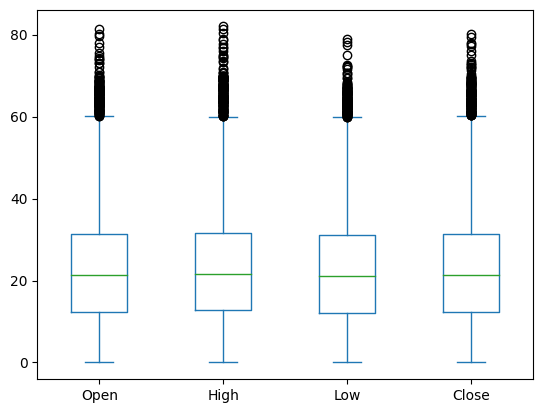

In [ ]:
csco[['Open','High','Low','Close']].plot(kind='box')

In [ ]:
csco['Date'] = pd.to_datetime(csco['Date'])
print(f'cisco contains stock prices between {csco.Date.min()} {csco.Date.max()}')
print(f'Total days = {(csco.Date.max()  - csco.Date.min()).days} days')

cisco contains stock prices between 1990-02-16 00:00:00 2023-10-31 00:00:00
Total days = 12310 days


standard scaler and minmax between 0 and 1

In [ ]:
# feature scaling for better acc


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
csco[['Open', 'High', 'Low']] = scaler.fit_transform(csco[['Open', 'High', 'Low']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
csco[['Open', 'High', 'Low']] = scaler2.fit_transform(csco[['Open', 'High', 'Low']])

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

layout = go.Layout(
    title='Stock Prices of cisco',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

dataCsco = [{'x':csco['Date'], 'y':csco['Close']}]
plot = go.Figure(data=dataCsco, layout=layout)
iplot(plot)

splitting the data


In [ ]:
from sklearn.model_selection import train_test_split

X = csco.iloc[:,1:4]
Y = csco['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
# 30% test size

X

,Open,High,Low
0,0.000000,0.000085,0.000066
1,0.000000,0.000085,0.000077
2,0.000000,0.000074,0.000088
3,0.000000,0.000106,0.000132
4,0.000000,0.000085,0.000121
...,...,...,...
8486,0.652157,0.650543,0.661588
8487,0.636930,0.635408,0.648676
8488,0.634106,0.635652,0.649815
8489,0.630545,0.629427,0.645890


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5943, 3)
(2548, 3)
(5943,)
(2548,)


model selection ( linear reg )

In [ ]:

from sklearn.linear_model import LinearRegression
#linear regg model

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

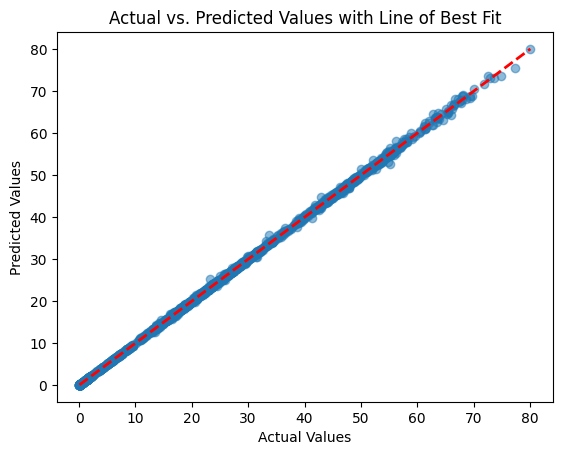

In [ ]:
import matplotlib.pyplot as plt
Y_pred = lr.predict(X_test)

plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Line of Best Fit')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lr.predict(X_train))}\t{r2_score(Y_test, lr.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lr.predict(X_train))}\t{mse(Y_test, lr.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9997727080269655	0.9997876030847117
MSE       0.06314426288551916	0.06115115431055674



good scores


In [ ]:
layout = go.Layout(
    title='Stock Prices of cisco',
    xaxis=dict(
        title='actual',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='predicted',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

dataCsco = [{'x': Y_test,'y':Y_pred}]
plot = go.Figure(data=dataCsco, layout=layout)
iplot(plot)

diff between the actual and predicted data

In [ ]:
df_pred = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
df_pred['Predicted'] = Y_pred
df_pred = df_pred.reset_index()


df_pred = df_pred.drop('index',axis=1)
df_pred

,Actual,Predicted
0,23.740000,23.769421
1,7.125000,7.167041
2,22.650000,22.537890
3,17.250000,17.234652
4,52.599998,52.306626
...,...,...
2543,18.000000,18.074786
2544,36.437500,36.655934
2545,14.470000,15.589420
2546,28.150000,28.311548


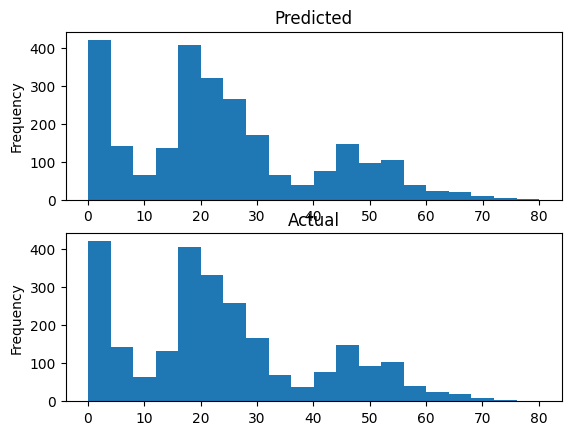

In [ ]:
from matplotlib import pyplot as plt
plt.subplot(2, 1, 1)
df_pred['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]]
plt.subplot(2, 1, 2)
df_pred['Actual'].plot(kind='hist',  bins=20, title='Actual')
plt.gca().spines[['top', 'right',]]


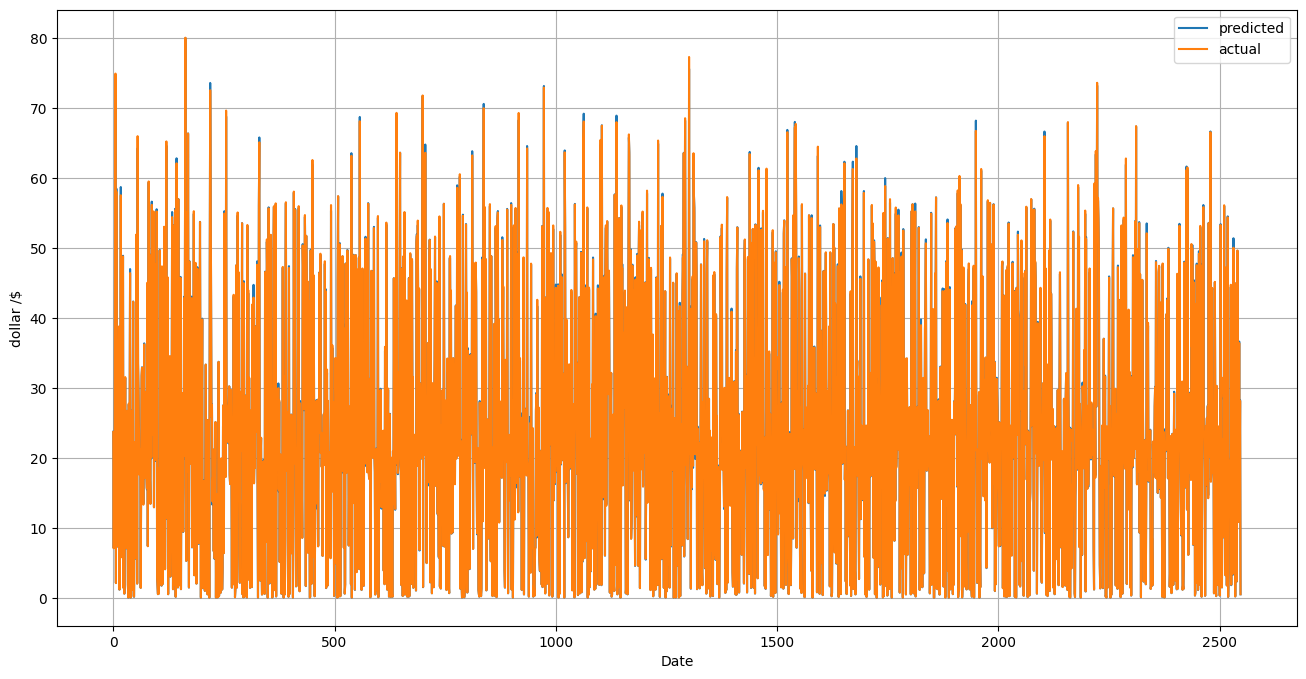

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

plt.plot(df_pred['Predicted'],label='predicted')
plt.plot(df_pred['Actual'],label='actual')

plt.xlabel('Date')
plt.ylabel('dollar /$')
plt.grid(True)
plt.legend()
plt.show()

low rmse and mape

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("MAPE:", mape)

RMSE: 0.24728759433209896
MAPE: 0.009715591052009207


to predict the closing price of the day,
enter the open,high,low prices of the day in the brackets in x,y,z and predict it

In [ ]:
#change between the brackets as your day
x= (51.349998)*0.635457	/51.750000
y=  (51.639999)*0.635896/52.169998
z=  (51.090000)*0.653359/51.680000

new_data = pd.DataFrame({'Open': [x], 'High': [y], 'Low': [z]})
predicted_price = lr.predict(new_data)

print('the predicted closing price is', predicted_price )

the predicted closing price is [51.36107686]
